# 2 偏差图

## 2.4 带标记的发散型棒棒糖图

### 2.4.1 导入绘图的包

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.patches as patches #导入补丁库

### 2.4.2 认识绘制发散型棒棒糖图的函数

**plt.hlines()<br>
plt.scatter()**

### 2.4.3 绘制简单的棒棒糖图

In [3]:
#随机生成10个数据
X = np.random.randn(10)
X.sort()
X

array([-0.99500343, -0.92668673, -0.76057808, -0.73934102, -0.50957385,
       -0.42571335, -0.23323661,  0.35832262,  0.81196454,  1.20134092])

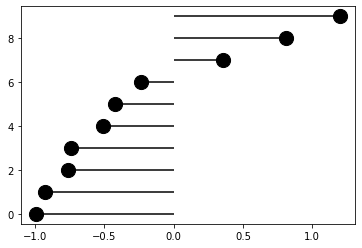

In [4]:
plt.hlines(y = range(10)
          ,xmin = 0
          ,xmax = X
          )
plt.scatter(X
           ,range(10)
           ,s = 200
           ,c = 'k'
           )

### 2.4.4 认识绘图的数据集并做简单数据处理

In [5]:
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/mtcars.csv')

In [6]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname
0,4.582576,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1,Mazda RX4,Mazda RX4
1,4.582576,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1,Mazda RX4 Wag,Mazda RX4 Wag
2,4.774935,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,Datsun 710,Datsun 710
3,4.626013,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1,Hornet 4 Drive,Hornet 4 Drive
4,4.324350,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1,Hornet Sportabout,Hornet Sportabout


In [7]:
df.shape

(32, 14)

In [8]:
#提取出mpg这一列所有的数据
x = df.loc[:, ['mpg']]

#z-score标准化处理
df['mpg_z'] = (x - x.mean())/x.std()

#根据标准化之后的目标数据，对整个数据集进行排序
df.sort_values('mpg_z', inplace = True)

#重置索引
df.reset_index(inplace = True)

#先设定颜色全部为黑色（black或k）
df['colors'] = 'black'

In [9]:
df.head()

,index,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname,mpg_z,colors
0,15,3.224903,8,460.0,215,3.00,5.424,17.82,0,0,3,4,0,Lincoln Continental,Lincoln Continental,-1.829979,black
1,14,3.224903,8,472.0,205,2.93,5.250,17.98,0,0,3,4,0,Cadillac Fleetwood,Cadillac Fleetwood,-1.829979,black
2,23,3.646917,8,350.0,245,3.73,3.840,15.41,0,0,3,4,0,Camaro Z28,Camaro Z28,-1.191664,black
3,6,3.781534,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0,Duster 360,Duster 360,-0.988049,black
4,16,3.834058,8,440.0,230,3.23,5.345,17.42,0,0,3,4,0,Chrysler Imperial,Chrysler Imperial,-0.908604,black


### 2.4.5 绘制发散型棒棒糖图

#### 2.4.5.1 绘制基本的发散型棒棒糖图

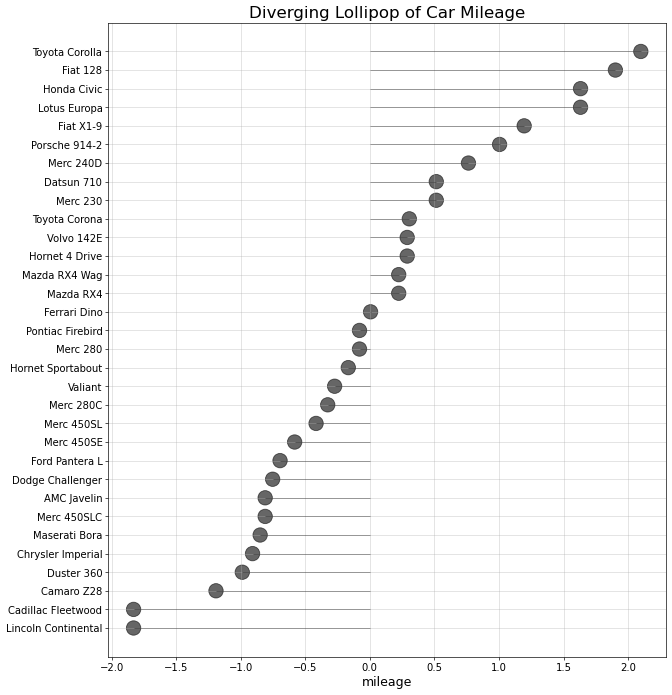

In [13]:
#创建画布并设定画布大小
plt.figure(figsize = (12,14), dpi = 60)

#绘制棒棒糖图
plt.hlines(y = df.index
          ,xmin = 0
          ,xmax = df.mpg_z
          ,color = df.colors
          ,alpha = 0.4
          ,linewidth = 1
          )
plt.scatter(df.mpg_z
           ,df.index
           ,color = df.colors
           ,s = 300
           ,alpha = 0.6
           )
#添加装饰
plt.title('Diverging Lollipop of Car Mileage', fontdict = {'size': 20})
plt.xlabel('mileage', fontsize = 15)
plt.yticks(df.index, df.carname, fontsize = 12)
plt.xticks(fontsize = 12)
plt.grid(linestyle = '-', alpha = 0.5)

#### 2.4.5.1 添加强调信息

1.强调某一款车型

In [14]:
#改变'Fiat X1-9'这款车的散点图颜色和大小
df.loc[df.cars == 'Fiat X1-9', 'colors'] = 'orange'

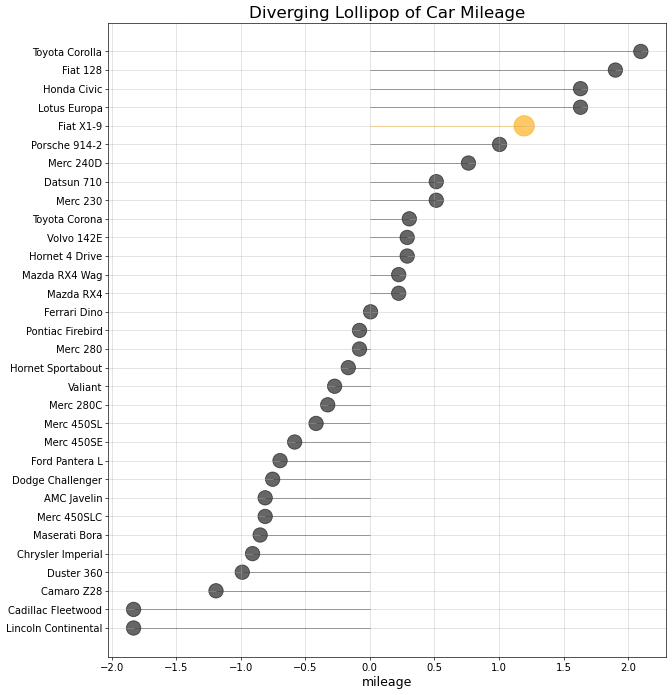

In [15]:
#创建画布并设定画布大小
plt.figure(figsize = (12,14), dpi = 60)

#绘制棒棒糖图
plt.hlines(y = df.index
          ,xmin = 0
          ,xmax = df.mpg_z
          ,color = df.colors
          ,alpha = 0.4
          ,linewidth = 1
          )
plt.scatter(df.mpg_z
           ,df.index
           ,color = df.colors
           ,s = [600 if i == 'Fiat X1-9' else 300 for i in df.cars]
           ,alpha = 0.6
           )
#添加装饰
plt.title('Diverging Lollipop of Car Mileage', fontdict = {'size': 20})
plt.xlabel('mileage', fontsize = 15)
plt.yticks(df.index, df.carname, fontsize = 12)
plt.xticks(fontsize = 12)
plt.grid(linestyle = '-', alpha = 0.5)

2.添加补丁，强调最大和最小的那两部分数据

**patches.Rectangle**
>重要参数
>>xy：补丁左下角的位置坐标<br>
>>width：补丁的宽度<br>
>>height：补丁的高度<br>
>>angle：旋转的角度(逆时针旋转)<br>
>>fill：是否填充<br>
>>facecolor：补丁内部的颜色<br>
>>edgecolor：补丁边框的颜色

In [16]:
#导入补丁库
from matplotlib import patches

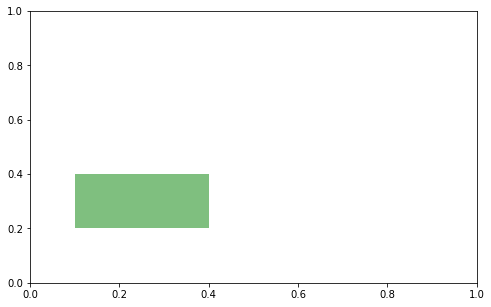

In [26]:
#创建画布和子图
fig, ax = plt.subplots(figsize = (8,5))
#创建补丁
p = patches.Rectangle(xy = (0.4, 0.2)
                     ,width = 0.2
                     ,height = 0.3
                     #,fill = False
                     ,facecolor = 'g'
                     #,edgecolor = 'r'
                     ,alpha = 0.5
                     ,angle = 90
                     )
ax.add_patch(p)

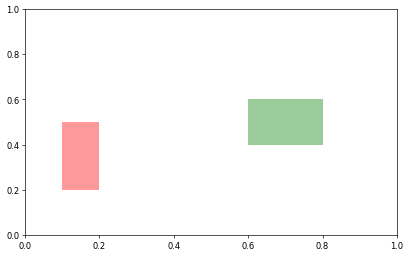

In [27]:
#创建画布并设定画布大小
plt.figure(figsize = (8,5), dpi = 60)

#创建2个补丁
p1 = patches.Rectangle((0.1,0.2), width = 0.1, height = 0.3, facecolor = 'r', alpha = 0.4)
p2 = patches.Rectangle((0.6,0.4), width = 0.2, height = 0.2, facecolor = 'g', alpha = 0.4)

#将补丁添加到子图上
plt.gca().add_patch(p1)
plt.gca().add_patch(p2)

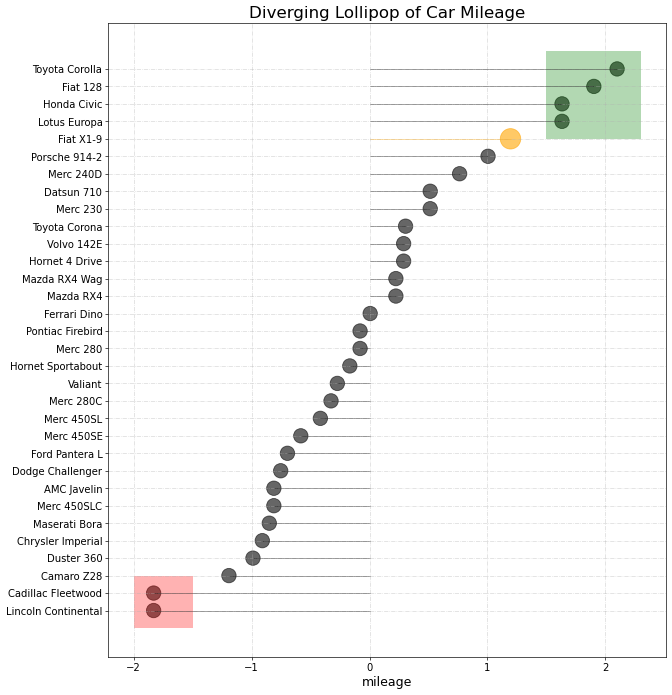

In [31]:
#创建画布并设定画布大小
plt.figure(figsize = (12,14), dpi = 60)

#绘制棒棒糖图
plt.hlines(y = df.index
          ,xmin = 0
          ,xmax = df.mpg_z
          ,color = df.colors
          ,alpha = 0.4
          ,linewidth = 1
          )
plt.scatter(df.mpg_z
           ,df.index
           ,color = df.colors
           ,s = [600 if i == 'Fiat X1-9' else 300 for i in df.cars]
           ,alpha = 0.6
           )

#创建矩形补丁
p1 = patches.Rectangle((1.5,27), width = 0.8, height = 5, facecolor = 'g', alpha = 0.3)
p2 = patches.Rectangle((-2,-1), width = 0.5, height = 3, facecolor = 'r', alpha = 0.3)

#将补丁添加到子图上
plt.gca().add_patch(p1)
plt.gca().add_patch(p2)

#添加装饰
plt.title('Diverging Lollipop of Car Mileage', fontdict = {'size': 20})
plt.xlabel('mileage', fontsize = 15)
plt.yticks(df.index, df.carname, fontsize = 12)
plt.xticks(fontsize = 12)
plt.grid(linestyle = '-.', alpha = 0.5)

3.添加注释：强调同款车型的信息

**plt.annotate()**

>重要参数
>>s：注释的文本内容<br>
>>xy：注释的起始位置<br>
>>xytext：文本的起始位置<br>
>>xycoords：xy坐标系(默认使用被注释对象的坐标轴，即xycoords = 'data')<br>
>>arrowprops：用来设置箭头<br>
>>facecolor：设置箭头的颜色<br>
>>headlength：箭头的头的长度<br>
>>headwidth：箭头的宽度<br>
>>width：箭身的宽度<br>

In [33]:
plt.annotate?

Text(0.5, 0.7, 'arrow2')

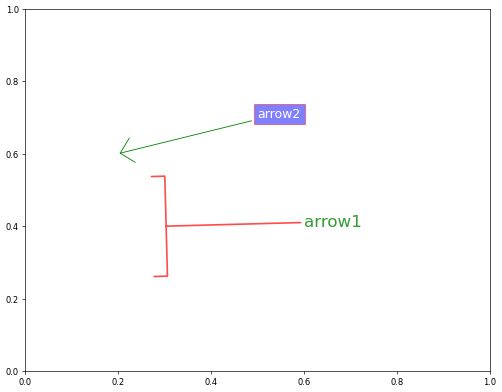

In [39]:
plt.figure(figsize = (10,8), dpi = 60)
plt.annotate('arrow1' #文本内容
             ,xy = (0.3, 0.4) #注释开始的坐标
             ,xytext = (0.6, 0.4) #文本的起始坐标
             ,xycoords = 'data'
             ,color = 'g' #文本的颜色
             ,fontsize = 20 #文本的字体大小
             ,alpha = 0.8 #文本颜色的饱和度
             ,arrowprops = dict(arrowstyle = '-[, widthB=3, lengthB=.8' #箭头类型，-[中括号+短横线，widthB箭头宽度，lengthB箭头长度
                               ,lw = 2 #线宽
                               ,color = 'r' #箭头的颜色
                               ,alpha = 0.7 #箭头颜色的饱和度
                              )
            )
plt.annotate('arrow2' #文本内容
             ,xy = (0.2, 0.6) #注释开始的坐标
             ,xytext = (0.5, 0.7) #文本的起始坐标
             ,xycoords = 'data'
             ,color = 'w' #文本的颜色
             ,fontsize = 15 #文本的字体大小
             ,bbox = dict(boxstyle = 'square' #方形箱体
                         ,fc = 'b' #箱体填充颜色
                         ,ec = 'r' #箱体边框颜色
                         ,alpha = 0.5 #填充和边框颜色的色彩饱和度
                         ) #添加箱体
             ,arrowprops = dict(arrowstyle = '->, head_length=1, head_width=1' #箭头类型
                               ,lw = 1 #线宽
                               ,color = 'g' #箭头的颜色
                               )
            )

常用的arrowstyle有：

|Name|Attrs|
|-|-|
|-|None|
|->|head_length = 0.4, head_width = 0.2|
|-\[|widthB = 1.0, lengthB = 0.2, angleB = None|
|\|-\||widthA = 1.0, widthB = 1.0| 
|-\|>|head_length = 0.4, head_width = 0.2|
|<-|head_length = 0.4, head_width = 0.2|
|<->|head_length = 0.4, head_width = 0.2|
|<\|-|head_length = 0.4, head_width = 0.2|
|<\|-\|>|head_length = 0.4, head_width = 0.2|
|fancy|head_length = 0.4, head_width = 0.4, tail_width = 0.4|
|simple|head_length = 0.5, head_width = 0.5, tail_width = 0.2|
|wedge|tail_width = 0.3, shrink_factor = 0.5|

常用的boxstyle有：circle、darrow、larrow、rarrow、round、round4、roundtooth、sawtooth、square

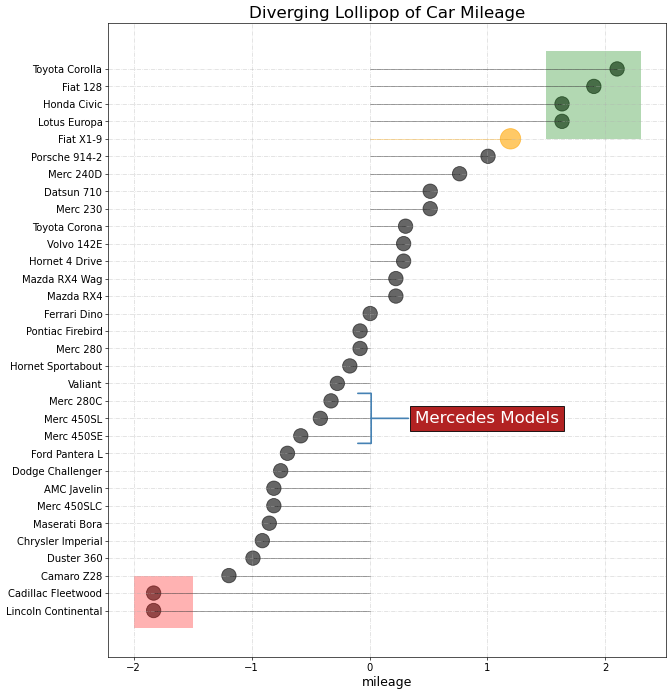

In [41]:
#创建画布并设定画布大小
plt.figure(figsize = (12,14), dpi = 60)

#绘制棒棒糖图
plt.hlines(y = df.index
          ,xmin = 0
          ,xmax = df.mpg_z
          ,color = df.colors
          ,alpha = 0.4
          ,linewidth = 1
          )
plt.scatter(df.mpg_z
           ,df.index
           ,color = df.colors
           ,s = [600 if i == 'Fiat X1-9' else 300 for i in df.cars]
           ,alpha = 0.6
           )

#创建矩形补丁
p1 = patches.Rectangle((1.5,27), width = 0.8, height = 5, facecolor = 'g', alpha = 0.3)
p2 = patches.Rectangle((-2,-1), width = 0.5, height = 3, facecolor = 'r', alpha = 0.3)

#将补丁添加到子图上
plt.gca().add_patch(p1)
plt.gca().add_patch(p2)

#添加注释
plt.annotate('Mercedes Models' #注释文本
            ,xy = (0,11) #注释起始位置坐标
            ,xytext = (1,11) #文本起始位置坐标
            ,xycoords = 'data' #使用的坐标系
            ,color = 'w' #文本颜色
            ,fontsize = 20 #文本字体大小
            ,ha = 'center' #水平对齐
            ,va = 'center' #垂直对齐
            ,bbox = dict(boxstyle = 'square' #方形箱体
                        ,fc = 'firebrick' #砖红色填充
                        )
            ,arrowprops = dict(arrowstyle = '-[, widthB = 1.5, lengthB = 0.8'
                              ,lw = 2 #线宽
                              ,color = 'steelblue' #颜色
                              ) #箭头
            )

#添加装饰
plt.title('Diverging Lollipop of Car Mileage', fontdict = {'size': 20})
plt.xlabel('mileage', fontsize = 15)
plt.yticks(df.index, df.carname, fontsize = 12)
plt.xticks(fontsize = 12)
plt.grid(linestyle = '-.', alpha = 0.5)

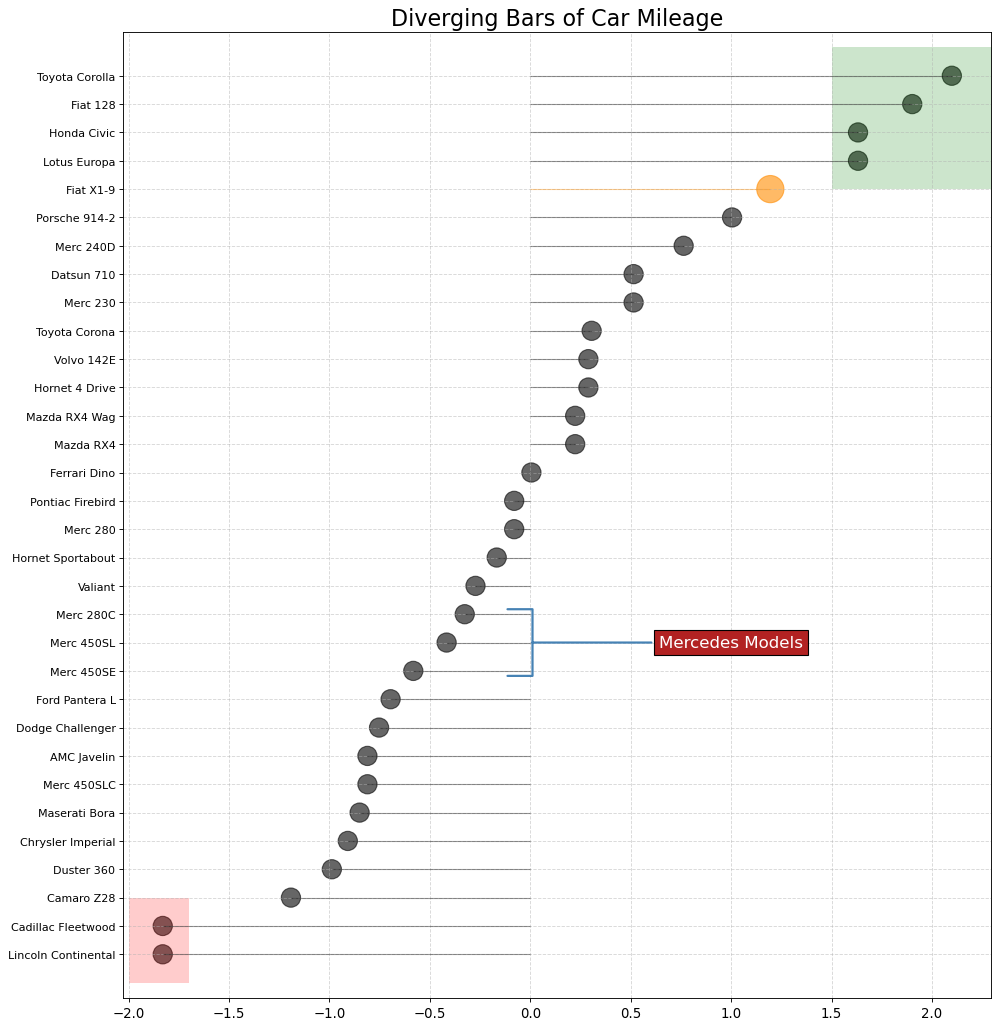

In [42]:
#源代码
#df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean()) / x.std()
df['colors'] = 'black'

# color fiat differently
df.loc[df.cars == 'Fiat X1-9', 'colors'] = 'darkorange'
df.sort_values('mpg_z', inplace = True)
df.reset_index(inplace = True)

# Draw plot
import matplotlib.patches as patches
plt.figure(figsize = (14,16), dpi = 80)
plt.hlines(y = df.index
          ,xmin = 0
          ,xmax = df.mpg_z
          ,color = df.colors
          ,alpha = 0.4
          ,linewidth = 1
          )
plt.scatter(df.mpg_z
           ,df.index
           ,color = df.colors
           ,s = [600 if x == 'Fiat X1-9' else 300 for x in df.cars]
           ,alpha = 0.6
           )
plt.yticks(df.index, df.cars)
plt.xticks(fontsize = 12)

# Annotate
plt.annotate('Mercedes Models'
            ,xy = (0.0, 11.0)
            ,xytext = (1.0, 11)
            ,xycoords = 'data'
            ,fontsize = 15
            ,ha = 'center'
            ,va = 'center'
            ,bbox = dict(boxstyle = 'square'
                        ,fc='firebrick'
                        )
            ,arrowprops = dict(arrowstyle = '-[, widthB=2.0, lengthB=1.5'
                              ,lw = 2.0
                              ,color = 'steelblue'
                              )
            ,color='white'
            )

# Add Patches
p1 = patches.Rectangle((-2.0, -1), width = .3, height = 3, alpha = .2, facecolor = 'red')
p2 = patches.Rectangle((1.5, 27), width = .8, height = 5, alpha = .2, facecolor = 'green')
plt.gca().add_patch(p1)
plt.gca().add_patch(p2)

# Decorate
plt.title('Diverging Bars of Car Mileage', fontdict={'size':20})
plt.grid(linestyle = '--', alpha = 0.5)
plt.show()